经典网络-LeNet 5
===

# 1.经典神经网络发展历史图表
| 年份 | 网络名称 | 作者 |
| --- | ------- | --- |
| 1998 | LeNet5 | LeCun |
| 2012 | AlexNet | Alex Krizhevsky |
| 2013 | ZFNet | 纽约大学 |
| 2014 | GoogLeNet | Google |
| 2014 | VGG | 牛津大学 |
| 2015 | ResNet-残差网络 | 何恺明 |
| 2016 | SqueezeNet | UC Berkeley & Stanford |
| 2017 | SENet-注意力机制网络 | Momenta |
| 2017 | DenseNet | 黄高团队 |
| 2017 | MobileNetv1 | Andrew G.Howard等 |
| 2017 | MobileNetv2 | Andrew G.Howard等 |
| 2017 | ShuffleNetv1 | Xiangyu Zhang等 |
| 2017 | ShuffleNetv2 | Xiangyu Zhang等 |
| - | CondenseNet | 黄高团队 |
| - | NASNet | Google |
| - | PNASNet | - |

# 2.LeNet-5网络结构
LeNet又名LeNet-5，是因为在LeNet中，使用的均是$5 \times 5$的卷积核。LeNet的结构如图
![images](Images/03/01/01_001.png)
LeNet中使用的结构直接影响了其之后沿用至今，卷积+池化+全连接至今仍然是最主流的结构。卷积操作使网络可以响应和卷积核形状类似的特征，而池化则使网络拥有了一定程度的不变性

## 2.1.INPUT
$32 \times32 $的手写数字（共10类）的黑白图片

## 2.2.C1
C1层使用了6个卷积核，每个卷积核的大小均是$5 \times5 $，pad=0, stride=1，激活函数使用的是反正切$tanh$.

所以一次卷积之后，Feature Map的大小是$\frac{32-5+1}{1}=28$，该层共有$28 \times 28 \times 6 = 4704$个神经元。

加上偏置项，该层共有$(5 \times 5 + 1) \times 6=146$个参数
$$
f(x) = tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$
​​#%% md
## 2.3.S2
S2层是卷积网络常使用的降采样层，在LeNet中，使用的是Max Pooling，降采样的步长是2，降采样核的大小也是2。经过S2层，Feature Map的大小减小一半

变成$14 \times 14$。该层共有$14 \times 14 \times 6=1176$个神经元；

## 2.4.C3
C3层是16个大小为$5 \times 5$，深度为6的卷积核，pad = 0，stride = 1，激活函数=$tanh$，一次卷积后，Feature Map的大小是

$\frac{14-5+1}{1}=10$，神经元个数为$10 \times10 \times 16 = 1600$，参数个数为$(5 \times5 \times 6+1) \times 16 = 2416$个参数；

## 2.5.S4
步长是2，大小是2的Max Pooling降采样，该层使Feature Map变成$5 \times 5$，共有$5 \times 5 \times 16 = 400$个神经元。

注意池化并不是一种具体的运算，而是代表着一种对统计信息的提取，所以不含有参数。例如在衡量学生考试成绩时，我们不考虑学生试卷的每一道题，而是用总分（平均分）作为评判标准。

另外一种常见的池化方式是平均池化（Average Pooling）。

## 2.6.C5
节点数为120的全连接，激活函数是$tanh$，参数个数是$(400+1) \times 120=48120$；

## 2.7.F6
节点数为84的全连接，激活函数是$tanh$，参数个数是$(120+1) \times 84=10164$；

## 2.8.OUTPUT
10分类的输出层，所以使用的是softmax激活函数，参数个数是$(84+1) \times 10=850$。softmax用于分类有如下优点：
1. $e^x$使所有样本的值均大于0，且指数的性质使样本的区分度尽量高；
2. softmax所有可能的和为1，反映出分类为该类别的概率，输出选择概率最高的即可。

# 3.代码实现

In [8]:
import torch
import torchvision as tv
import matplotlib.pyplot as plt
import jjzhk.progressbar as bar
import ELib.pyt.dataset as data


class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1   = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=0)
        self.tanh1   = torch.nn.Tanh()
        self.pool1   = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2   = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.tanh2   = torch.nn.Tanh()
        self.pool2   = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1     = torch.nn.Linear(in_features=16 * 4 * 4, out_features=120)
        self.tanh3   = torch.nn.Tanh()
        self.fc2     = torch.nn.Linear(in_features=120, out_features=84)
        self.tanh4   = torch.nn.Tanh()
        self.fc3     = torch.nn.Linear(in_features=84, out_features=10)
        self.softmax = torch.nn.Softmax()

    def forward(self, input):
        x = self.conv1(input)
        x = self.tanh1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.tanh2(x)
        x = self.pool2(x)
        x = x.view(-1, 16 * 4 * 4)
        x = self.fc1(x)
        x = self.tanh3(x)
        x = self.fc2(x)
        x = self.tanh4(x)
        x = self.fc3(x)
        x = self.softmax(x)
        
        return x


model = LeNet5()
transform_train = tv.transforms.Compose([
    tv.transforms.ToTensor()
])
trainset = data.MnistDatasetForPytorch(root='/Users/JJZHK/data/input/mnist.npz', train=True, radio=0.8, transform = transform_train)
loader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
criterion = torch.nn.CrossEntropyLoss()

In [9]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
showbar = bar.ProgressBar(30, len(loader), 'Loss: %.3f | Acc: %.3f')
total_loss = []
total_accu = []
for epoch in range(0, 30):
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(loader):
        inputs = torch.autograd.Variable(inputs)
        targets = torch.autograd.Variable(torch.squeeze(targets, dim=1).type(torch.LongTensor))

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        prediction = torch.max(torch.nn.functional.softmax(outputs), 1)[1]
        pred_label = prediction.data.cpu().numpy().squeeze()
        target_y = targets.data.cpu().numpy()
        accuracy = sum(pred_label == target_y) / len(target_y)

        #showbar.show(epoch + 1, train_loss / (batch_idx + 1), accuracy)
    
    print("%d:%.3f,%.3f" % (epoch + 1, train_loss / (batch_idx + 1), accuracy))
    total_loss.append(train_loss / (batch_idx + 1))
    total_accu.append(accuracy)
print(total_loss)
print(total_accu)

/Users/JJZHK/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/Users/JJZHK/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


1:2.300,0.219
2:2.242,0.328
3:2.025,0.625
4:1.793,0.812
5:1.678,0.750
6:1.641,0.828
7:1.621,0.922
8:1.570,0.891
9:1.543,0.938
10:1.530,0.906
11:1.520,0.906
12:1.514,0.938
13:1.509,0.969
14:1.505,0.953
15:1.501,0.953
16:1.499,0.969
17:1.497,1.000
18:1.495,1.000
19:1.493,0.984
20:1.491,1.000
21:1.490,0.969
22:1.489,0.969
23:1.488,0.953
24:1.487,1.000
25:1.486,0.969
26:1.485,0.984
27:1.484,1.000
28:1.483,1.000
29:1.483,0.969
30:1.482,0.984
[2.299819593015871, 2.241516228680197, 2.025000642695928, 1.7929594758983072, 1.678320775293324, 1.6406906780586938, 1.6206110307615098, 1.5702128584526445, 1.5432994711344645, 1.529569942112927, 1.5204947065545, 1.5137702419877597, 1.5087256303660945, 1.5047522470286991, 1.5014884335809646, 1.4988220769520764, 1.4965118640634023, 1.4945228687704426, 1.492833287748572, 1.4912689720114616, 1.49006722724601, 1.4888058081609474, 1.487713072942272, 1.486724817045203, 1.4859072473495518, 1.4849427053917488, 1.4842070101602982, 1.4834431121338447, 1.482792980

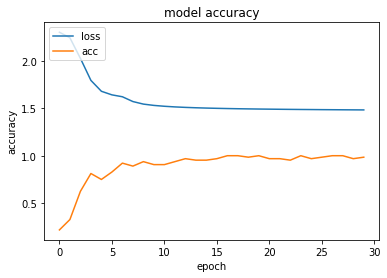

In [10]:
plt.plot(total_loss)
plt.plot(total_accu)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc='upper left')
plt.show()